In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from scipy.stats import linregress as linreg

def mean(x):
    sum = 0
    for i in x:
        sum += i
    return sum/len(x)

def var(x):
    sum, m = 0, mean(x)
    for i in x:
        sum += (i-m)**2
    return sum/(len(x)-1)

def std(x):
    return np.sqrt(var(x))

In [24]:
data1 = np.loadtxt(os.path.join(os.getcwd(), 'eins_daten.csv'), delimiter=',')/3
benedikt_cc_1 = data1[:,0]
florian_cc_1 = data1[:,1]
benedikt_c_1 = data1[:,2]
florian_c_1 = data1[:,3]

benedikt_cc_1_mean = mean(benedikt_cc_1)
florian_cc_1_mean = mean(florian_cc_1)
benedikt_c_1_mean = mean(benedikt_c_1)
florian_c_1_mean = mean(florian_c_1)

benedikt_cc_1_var = var(benedikt_cc_1)
florian_cc_1_var = var(florian_cc_1)
benedikt_c_1_var = var(benedikt_c_1)
florian_c_1_var = var(florian_c_1)

benedikt_cc_1_std = std(benedikt_cc_1)
florian_cc_1_std = std(florian_cc_1)
benedikt_c_1_std = std(benedikt_c_1)
florian_c_1_std = std(florian_c_1)

print(np.round([benedikt_cc_1_mean, florian_cc_1_mean, benedikt_c_1_mean, florian_c_1_mean],2))
print(np.round([benedikt_cc_1_var, florian_cc_1_var, benedikt_c_1_var, florian_c_1_var],6))
print(np.round([benedikt_cc_1_std, florian_cc_1_std, benedikt_c_1_std, florian_c_1_std],4))
print(mean(data1.flatten()), var(data1.flatten()), std(data1.flatten()))

[6.53 6.51 6.55 6.52]
[0.001726 0.000815 0.000807 0.000653]
[0.0415 0.0285 0.0284 0.0256]
6.526750000000002 0.0011786253561253603 0.03433111352877096


In [25]:
data2 = np.loadtxt(os.path.join(os.getcwd(), 'zwei_daten.csv'), delimiter=',')/3
benedikt_cc_2 = data2[:,0]
florian_cc_2 = data2[:,1]
benedikt_c_2 = data2[:,2]
florian_c_2 = data2[:,3]

benedikt_cc_2_mean = mean(benedikt_cc_2)
florian_cc_2_mean = mean(florian_cc_2)
benedikt_c_2_mean = mean(benedikt_c_2)
florian_c_2_mean = mean(florian_c_2)

benedikt_cc_2_var = var(benedikt_cc_2)
florian_cc_2_var = var(florian_cc_2)
benedikt_c_2_var = var(benedikt_c_2)
florian_c_2_var = var(florian_c_2)

benedikt_cc_2_std = std(benedikt_cc_2)
florian_cc_2_std = std(florian_cc_2)
benedikt_c_2_std = std(benedikt_c_2)
florian_c_2_std = std(florian_c_2)

print(np.round([benedikt_cc_2_mean, florian_cc_2_mean, benedikt_c_2_mean, florian_c_2_mean],2))
print(np.round([benedikt_cc_2_var, florian_cc_2_var, benedikt_c_2_var, florian_c_2_var],6))
print(np.round([benedikt_cc_2_std, florian_cc_2_std, benedikt_c_2_std, florian_c_2_std],4))
print(mean(data2.flatten()), var(data2.flatten()), std(data2.flatten()))

[8.62 8.59 8.64 8.64]
[0.001367 0.001521 0.000899 0.010554]
[0.037  0.039  0.03   0.1027]
8.623250000000002 0.003835035612535619 0.061927664355565834


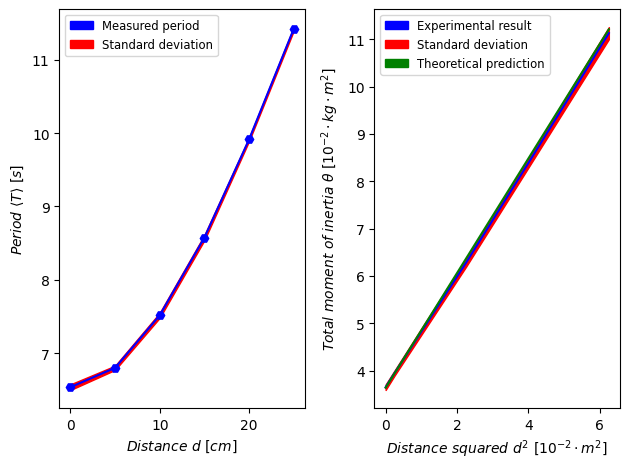

In [26]:
mass_bar = 0.606
depth_bar = 0.011
length_bar = 0.6
theta_0 = 2*mass_bar*(length_bar**2+depth_bar**2)/12
D = 4*np.pi**2*theta_0/(mean(data1.flatten())**2)
D_uncertainty = np.sqrt((-8*np.pi**2*theta_0/mean(data1.flatten())**3)**2*std(data1.flatten())**2)

data3 = np.loadtxt(os.path.join(os.getcwd(), 'drei_daten.csv'), delimiter=',')/3
steiner_distances = np.array([0., 0.05, 0.1, 0.15, 0.2, 0.25])
steiner_periods = [data3[:,0], data3[:,1], data3[:,2], data3[:,3], data3[:,4], data3[:,5]]
steiner_means = np.array([mean(i) for i in steiner_periods])
steiner_stds = np.array([std(i) for i in steiner_periods])
steiner_thetas = np.array([i**2*D/(4*np.pi**2) for i in steiner_means])
steiner_thetas_stds = np.sqrt((steiner_means*D/(2*np.pi**2))**2*steiner_stds**2+(steiner_means**2/(4*np.pi**2))**2*D_uncertainty**2)
steiner_distances_squared = steiner_distances**2
steiner_in_theory = np.array([theta_0+2*mass_bar*i for i in steiner_distances_squared])

fig, axs = plt.subplots(1,2)
axs[0].plot(100*steiner_distances, steiner_means, color='blue', marker='H')
axs[0].fill_between(100*steiner_distances, steiner_means-steiner_stds, steiner_means+steiner_stds, color='red')
per_patch = mpatches.Patch(color='blue', label='Measured period')
ter_patch = mpatches.Patch(color='red', label='Standard deviation')
axs[0].legend(handles=[per_patch, ter_patch], fontsize='small')
axs[0].set_xlabel(r'$Distance~d~[cm]$')
axs[0].set_ylabel(r'$Period~\langle T \rangle~[s]$')

axs[1].plot(100*steiner_distances_squared, 100*steiner_thetas, color='blue')
axs[1].fill_between(100*steiner_distances_squared, 100*(steiner_thetas-steiner_thetas_stds), 100*(steiner_thetas+steiner_thetas_stds), color='red')
axs[1].plot(100*steiner_distances_squared, 100*steiner_in_theory, color='green')
exp_patch = mpatches.Patch(color='blue', label='Experimental result')
err_patch = mpatches.Patch(color='red', label='Standard deviation')
the_patch = mpatches.Patch(color='green', label='Theoretical prediction')
axs[1].legend(handles=[exp_patch, err_patch, the_patch], fontsize='small')
axs[1].set_xlabel(r'$Distance~squared~d^{2}~[10^{-2} \cdot m^{2}]$')
axs[1].set_ylabel(r'$Total~moment~of~inertia~\theta~[10^{-2} \cdot kg\cdot m^{2}]$')
fig.tight_layout()
#plt.savefig(os.path.join(os.getcwd(), 'drei_daten_plot.pdf'), dpi=600)
plt.show()

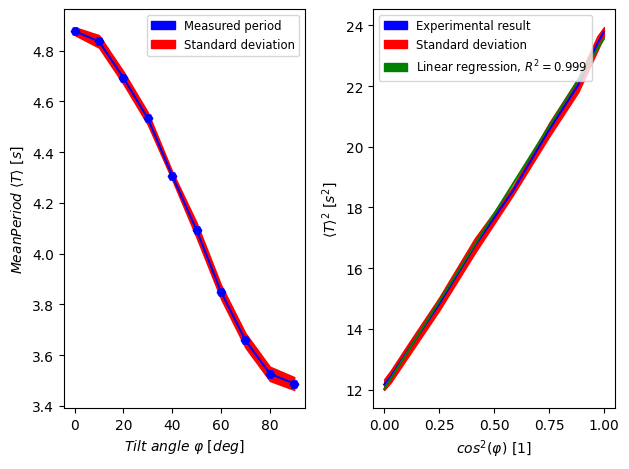

In [27]:
data4 = np.loadtxt(os.path.join(os.getcwd(), 'vier_daten.csv'), delimiter=',')/3
ellipse_angles = np.array([(9-i)*np.pi/18 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
ellipse_degs = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
ellipse_periods = [data4[:,i] for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
ellipse_means = np.array([mean(i) for i in ellipse_periods])
ellipse_stds = np.array([std(i) for i in ellipse_periods])
ellipse_cos_sq = np.cos(ellipse_angles)**2
ellipse_T_sq = ellipse_means**2
ellipse_T_sq_err = np.sqrt((2*ellipse_means)**2*ellipse_stds**2)
ellipse_lin_fit = linreg(ellipse_cos_sq, ellipse_T_sq)

fig, axs = plt.subplots(1,2)
axs[0].plot(ellipse_degs, ellipse_means, color='blue', marker='H')
axs[0].fill_between(ellipse_degs, ellipse_means-ellipse_stds, ellipse_means+ellipse_stds, color='red')
per_patch2 = mpatches.Patch(color='blue', label='Measured period')
ter_patch2 = mpatches.Patch(color='red', label='Standard deviation')
axs[0].legend(handles=[per_patch2, ter_patch2], fontsize='small')
axs[0].set_xlabel(r'$Tilt~angle~\varphi~[deg]$')
axs[0].set_ylabel(r'$Mean Period~\langle T \rangle~[s]$')

axs[1].plot(ellipse_cos_sq, ellipse_T_sq, color='blue')
axs[1].fill_between(ellipse_cos_sq, ellipse_T_sq-ellipse_T_sq_err, ellipse_T_sq+ellipse_T_sq_err, color='red')
axs[1].plot(ellipse_cos_sq, ellipse_cos_sq*ellipse_lin_fit.slope+ellipse_lin_fit.intercept, color='green')
exp_patch2 = mpatches.Patch(color='blue', label='Experimental result')
err_patch2 = mpatches.Patch(color='red', label='Standard deviation')
reg_patch = mpatches.Patch(color='green', label=r"Linear regression, $R^{2} = $"+f"{ellipse_lin_fit.rvalue**2:.3f}")
axs[1].legend(handles=[exp_patch2, err_patch2, reg_patch], fontsize='small')
axs[1].set_xlabel(r'$ cos^{2} (\varphi )~[1]$')
axs[1].set_ylabel(r'$ \langle T \rangle ^{2}~[s^{2}]$')
fig.tight_layout()
#plt.savefig(os.path.join(os.getcwd(), 'vier_daten_plot.pdf'), dpi=600)
plt.show()